In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme() # Apply the default theme

# **A. THU THẬP DỮ LIỆU**

### *1. Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?*
* Trong đời sống hiện đại, sức khỏe là một trong những khía cạnh được con người quan tâm nhiều nhất. Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong. Vì vậy, nhóm 15 quyết định tìm hiểu dữ liệu về các yếu tố và hành vi trong cuộc sống có thể dẫn đến nguy cơ đột quỵ.

### *2. Dữ liệu mà nhóm sinh viên là về chủ đề gì và lấy từ nguồn nào?*
* Dữ liệu nhóm cung cấp về chủ đề Các yếu tố và thói quen sinh hoạt của bệnh nhân có thể dẫn đến nguy cơ đột quỵ. Dữ liệu này được sử dụng để dự đoán, xác định xem một bệnh nhân có khả năng bị đột quỵ hay không dựa vào các yếu tố như giới tính, độ tuổi, bệnh cao huyết áp, tình trạng bệnh tim, tình trạng kết hôn, tính chất công việc, môi trường sinh sống, chỉ số đường huyết, chỉ số BMI, tình trạng hút thuốc của bệnh nhân.
* Nguồn: Stroke Prediction Dataset từ Kaggle, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### *3. Người ta có cho phép sử dụng dữ liệu như thế này hay không?*
* Người cung cấp dataset cho phép sử dụng dữ liệu với mục đích giáo dục. Trong phần Acknowledgements có chú thích: (Confidential Source) - Use only for educational purposes.

### *4. Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?*
* Về vấn đề cách thức thu thập dữ liệu, Dataset Creator đã công bố trên Kaggle Discussion, về vấn đề bảo mật quyền riêng tư, các nguồn thông tin và phương pháp thu thập dữ liệu trong dataset chỉ được lưu hành nội bộ.
* Link bài đăng của Dataset Creator: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/discussion/237113

# **B. KHÁM PHÁ DỮ LIỆU**

## **1. Đọc dữ liệu và một số thông tin phổ biến**

In [4]:
patient_df = pd.read_csv('healthcare_dataset_stroke.csv', index_col='id')
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


* Số dòng và cột của dataset

In [5]:
n_rows, n_cols = patient_df.shape
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_cols}")

Number of rows: 5110
Number of columns: 11


* Dữ liệu có bị lặp

In [8]:
is_duplicate_rows = patient_df.duplicated().any()
is_duplicate_rows

False

## **2. Khám phá dữ liệu**

### *2.1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?*
* Theo mô tả dữ liệu và quan sát sơ bộ Stroke Prediction Dataset, một dòng cho biết các thông tin về yếu tố và thói quen, hành vi có nguy cơ dẫn đến đột quỵ của một bệnh nhân. 
* Không có vấn đề các dòng có ý nghĩa khác nhau.

### *2.2. Mỗi cột có ý nghĩa gì?*
Ý nghĩa từng cột:
* **id**: mã định danh từng bệnh nhân, mỗi bệnh nhân có một mã định danh riêng.
* **gender**: giới tính của bệnh nhân, gồm 3 loại: 'Male', 'Female' và 'Other'.
* **age**: tuổi của từng bệnh nhân.
* **hypertension**: tình trạng bệnh cao huyết áp của bệnh nhân, gồm 2 loại: '0' nếu bệnh nhân không bị cao huyết áp và '1' nếu bệnh nhân có bệnh cao huyết áp.
* **heart_disease**: tình trạng bệnh tim của bệnh nhân, gồm 2 loại: '0' nếu bệnh nhân không bị bệnh tim và '1' nếu bệnh nhân có bệnh tim.
* **ever_married**: tình trạng kết hôn, gồm 2 loại: 'No' nếu bệnh nhân chưa từng kết hôn và 'Yes' nếu bệnh nhân đang hoặc đã từng kết hôn.
* **work_type**: loại công việc mà bệnh nhân đang làm, gồm 5 loại: 'Private', 'Self-employed', 'Govt_job', 'children' và 'Never_worked'.
* **Residence_type**: loại môi trường bệnh nhân sinh sống, gồm 2 loại: 'Rural' và 'Urban'.
* **avg_glucose_level**: chỉ số đường huyết của từng bệnh nhân.
* **bmi**: chỉ số Body Mass Index (BMI) của từng bệnh nhân.
* **smoking_status**: tình trạng hút thuốc của bệnh nhân, gồm 4 loại: 'formerly smoked', 'never smoked', 'smokes' và 'Unknown'.
* **stroke**: tình trạng bệnh nhân đã từng bị đột quỵ hay không, gồm 2 loại: '0' nếu bệnh nhân không bị đột quỵ và '1' nếu bệnh nhân từng bị đột quỵ.

### *2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?*

In [6]:
col_dtypes = patient_df.dtypes
col_dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

*Kiểm tra xem có cột nào có kiểu dữ liệu chưa phù hợp không?*
* Các cột `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status` đều có dtype là object, thường ám chỉ kiểu chuỗi. Để kiểm tra được kiểu dữ liệu thật sự của các phần tử trong cột thì phải tiến hành truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.

In [7]:
for i in range(len(patient_df)):
    assert type(patient_df['gender'].iloc[i]) == str
    assert type(patient_df['ever_married'].iloc[i]) == str
    assert type(patient_df['work_type'].iloc[i]) == str
    assert type(patient_df['Residence_type'].iloc[i]) == str
    assert type(patient_df['smoking_status'].iloc[i]) == str

* Như vậy, kiểu dữ liệu của các phần tử trong các cột `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status` đều là kiểu chuỗi, nên phù hợp.
* Cột `id` có kiểu dữ liệu **int64** là phù hợp vì mã định danh của bệnh nhân đều ở dạng số nguyên. Còn các cột `hypertension`, `heart_disease`, `stroke` đều có dữ liệu dạng số là '0' và '1' nên kiểu dữ liệu **int64** là phù hợp.
* Các cột `age`, `avg_glucose_level`, `bmi` đều là những chỉ số, có thể không phải ở dạng số nguyên nên kiểu dữ liệu **float64** là phù hợp.

### *2.4. `Phân loại` các features dạng **Numerical** and **Categorical** và `sự phân bố` của các features*

#### 2.4.1. Phân loại
* Categorical: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`
  * Nominal: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`
  * Ordinal: không có dữ liệu được phân loại theo Ordinal.
* Numerical: `age`, `avg_glucose_level`, `bmi`
  * Discrete: không có dữ liệu được phân loại theo Discrete.
  * Continuous: `age`, `avg_glucose_level`, `bmi`

* Theo như data dictionary, nếu mà bệnh nhân được đánh dấu là 1, thì người ấy bị đột quỵ. Rõ ràng, số 0 hay 1 là một cái cờ hiệu để biết rằng bệnh nhân đó có bị đột quỵ hay không. Đúng, kiểu dữ liệu của column 'Stroke' là int64, điều này là nó thuộc loại số. Tuy nhiên, ta có thể thay đổi với những dòng lệnh sau.

In [8]:
patient_df['stroke'] = patient_df['stroke'].astype('category')

In [9]:
patient_df['stroke'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [10]:
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

features = num_features + cat_features
print(features)

['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


* Chuyển những đặc trưng thuộc Categorical mà ta đã phân tích ở trên về đúng kiểu `category`

In [11]:
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(patient_df, cat_features)   

In [16]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 200.8 KB


#### 2.4.2. Sự phân tán của các đặc trưng (Chỗ này có thể phân tích rõ xíu từng đặc trưng)

`Distribution of Numerical feature values across the samples`

In [18]:
patient_df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


* Column 'bmi' có chứa giá trị null. Mình sẽ xử lý ở bước EDA
* Nhìn vào các giá trị min, std và max của 3 đặc trưng. Ta thấy có xuất hiện giá trị ngoại lai

`Distribution of Categorical feature values across the samples`

In [17]:
patient_df.describe(include='category')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


#### Biến mục tiêu: Stroke

In [19]:
stroke_df = patient_df['stroke'].value_counts().to_frame()

In [20]:
patient_df['stroke'].value_counts(normalize=True).to_frame()

,stroke
0,0.951272
1,0.048728


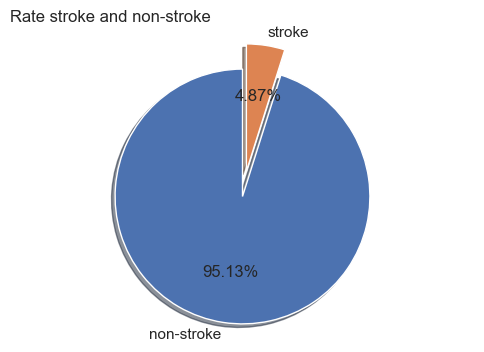

In [21]:
sizes = np.asarray(stroke_df).flatten()
labels = 'non-stroke', 'stroke'
explode = (0, 0.2)

fig,ax = plt.subplots(figsize=(6,4))

ax.pie(sizes, explode=explode, labels=labels,
        autopct='%1.2f%%',
        shadow=True, startangle=90)

ax.axis('equal')
ax.set_title(label="Rate stroke and non-stroke", loc='left');

Chỉ có 4.87% người bị mắc bệnh đột quỵ.

### *2.5. Feature Engineering and Data Wrangling (Data pre-processing)*

* Tiền xử lý Feature `BMI`

In [22]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Column {col} has {missing_count/n_rows*100:.2f} % missing values.")

display_missing(patient_df, patient_df.columns)

Column bmi has 3.93 % missing values.


In [23]:
patient_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

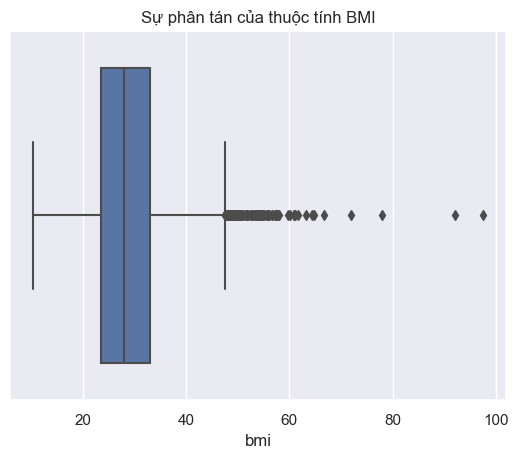

In [24]:
sns.boxplot(data=patient_df, x='bmi')
plt.title("Sự phân tán của thuộc tính BMI");

* Ta thấy giá trị mean = 28.89 và độ lệch chuẩn std = 7.85
* Tuy nhiên, giá trị max = 97.6. Xuất hiện giá trị ngoại lai. Vì vậy, ta không thể dùng fill null bằng chiến lược điền bằng mean vì có thể gây ra sai số nhiều.

* Chiến lược ta sẽ chọn 1 giá trị bmi `hợp lý` dựa vào feature `age`

`B1:` Ta nhóm các giá trị độ tuổi thành từng nhóm trẻ em (0-16), thanh niên (16-40), trung niên (40-65), cao tuoi (65-100)

In [25]:
#patient_df['age_title'] = pd.cut(patient_df['age'], bins=[0,16,40,65,100], labels=["Tre em", "Thanh nien", "Trung nien", "Cao tuoi"])


patient_df['age_title'] = pd.cut(patient_df['age'], bins=[0,11,17,29,44,64,100], 
                                 labels=["Trẻ em", "Thiếu niên", "Thanh niên", "Người lớn", "Trung niên", "Cao tuổi"])

In [26]:
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_title
id,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Cao tuổi
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Trung niên
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Cao tuổi
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Trung niên
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Cao tuổi


`B2:` Ta nhóm cột `Title` (theo loại độ tuổi) và tính giá trị `bmi` theo từng loại

In [27]:
bmi_by_gender_age = patient_df.groupby(['age_title']).median()['bmi']
bmi_by_gender_age

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8948\2862572560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bmi_by_gender_age = patient_df.groupby(['age_title']).median()['bmi']


age_title
Trẻ em        18.4
Thiếu niên    23.5
Thanh niên    26.2
Người lớn     29.9
Trung niên    30.4
Cao tuổi      28.9
Name: bmi, dtype: float64

`B3:` Điền những giá trị `bmi` vào chỗ null sao cho hợp lý.

In [28]:
patient_df['bmi'] = patient_df.groupby(['age_title'])['bmi'].apply(lambda x: x.fillna(x.median()))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8948\1194631767.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  patient_df['bmi'] = patient_df.groupby(['age_title'])['bmi'].apply(lambda x: x.fillna(x.median()))


In [29]:
count = patient_df['bmi'].isna().sum()
print(f"Số lượng giá trị null của column bmi sau khi xử lý là: {count}")

Số lượng giá trị null của column bmi sau khi xử lý là: 0


**`Sau khi có xử lý các giá trị null ở column BMI`**
* `Ta phân loại BMI 5 mức độ béo phì theo WHO`
- Thiếu cân: < 18.5
- Cân đối: 18.5 - 24.9
- Thừa cân: 25-29.9
- Béo phì: 30-34.9
- Béo phì nguy hiểm: >= 35

In [30]:
patient_df['bmi_title'] = pd.cut(patient_df['bmi'], bins=[0, 18.5, 25, 30, 35, 100], right=False,
                   labels=["Thiếu cân", "Cân đối", "Thừa cân", "Béo phì", "Béo phì nguy hiểm"])
# patient_df['bmi_title'] = pd.cut(patient_df['bmi'], bins=[0, 18.5, 25, 100], right=False,
#                    labels=["Thiếu cân", "Cân đối", "Béo phì"])

In [31]:
patient_df.head()
# patient_df['bmi_title'] = patient_df.drop("bmi_title", axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_title,bmi_title
id,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Cao tuổi,Béo phì nguy hiểm
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1,Trung niên,Béo phì
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Cao tuổi,Béo phì
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Trung niên,Béo phì
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Cao tuổi,Cân đối


## 3. Correlating categorical features (Mối quan hệ)

### 3.1 Correlating categorical features
Categorical: `stroke`, `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`

#### Gender (Liệu giới tính có ảnh hưởng gì đến quyết định mức độ đột quỵ không)

In [32]:
patient_df['gender'].value_counts().to_frame()

,gender
Female,2994
Male,2115
Other,1


In [33]:
patient_df.groupby('gender')['stroke'].value_counts().to_frame()

stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1
       1            0

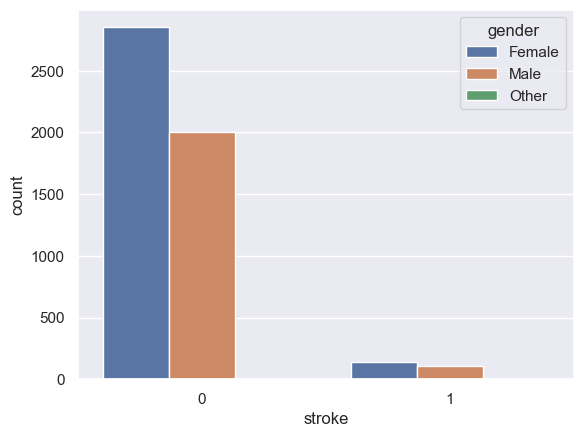

In [34]:
sns.countplot(data=patient_df, x='stroke', hue='gender');

* Ta thấy người giới tính nam bị đột quỵ nhiều hơn giới tính nữ. Nhưng chênh lệch không quá nhiều. 

Tách người bị đột quỵ ra trước

In [35]:
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_title,bmi_title
id,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Cao tuổi,Béo phì nguy hiểm
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1,Trung niên,Béo phì
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Cao tuổi,Béo phì
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Trung niên,Béo phì
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Cao tuổi,Cân đối


In [36]:
people_by_stroke = patient_df.loc[(patient_df.stroke == 1),('stroke','gender')]

Trực quan stroke theo giới tính

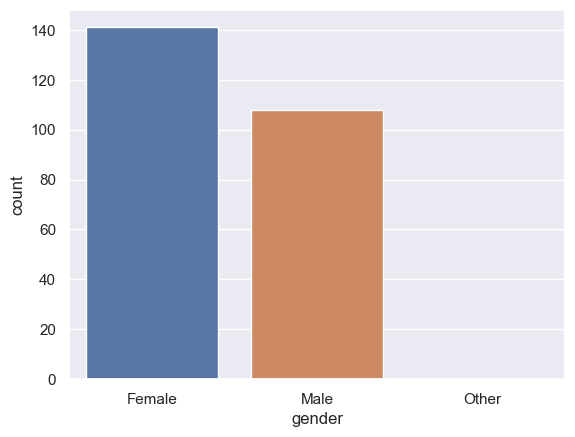

In [37]:
sns.countplot(data=people_by_stroke, x='gender');

Tỷ lệ nam bị đột quỵ nhiều hơn nữ bị đột quỵ

#### Married 
* Câu hỏi: Liệu một người kết hôn khiến họ hạnh phúc thì có giảm tỷ lệ đột quỵ cho họ không?

In [38]:
patient_df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

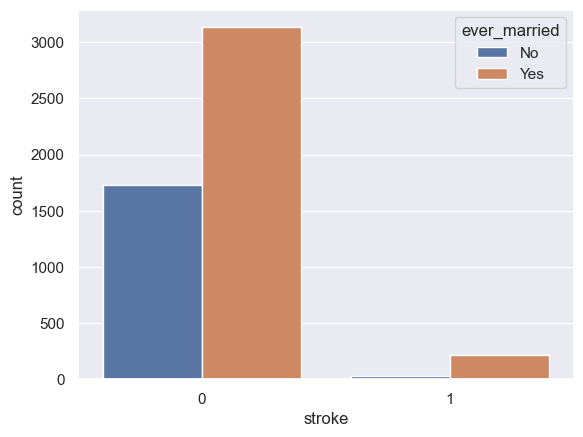

In [39]:
sns.countplot(data=patient_df, x='stroke', hue='ever_married')

#### Hypertension, Heart_disease
* Liệu một người bị mắc bệnh huyết áp hay bệnh tim có dẫn đến người đó dễ bị đột quỵ không?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


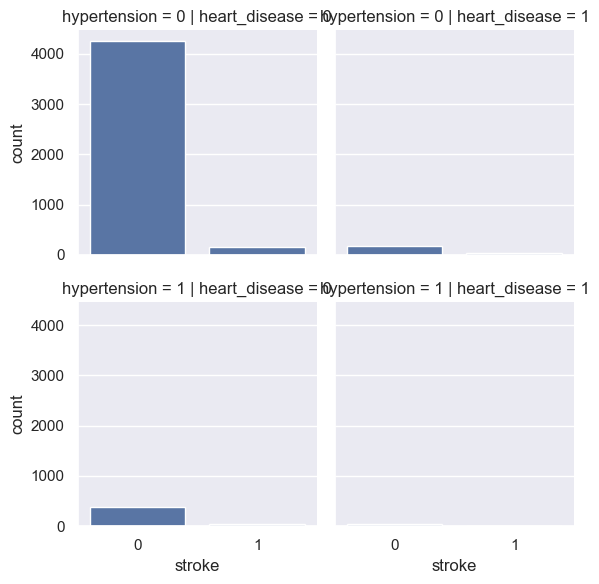

In [40]:
stroke_fg = sns.FacetGrid(data=patient_df, row="hypertension", col="heart_disease")
stroke_fg.map(sns.countplot,'stroke');

### Các cột đặc trưng thuộc Category còn lại

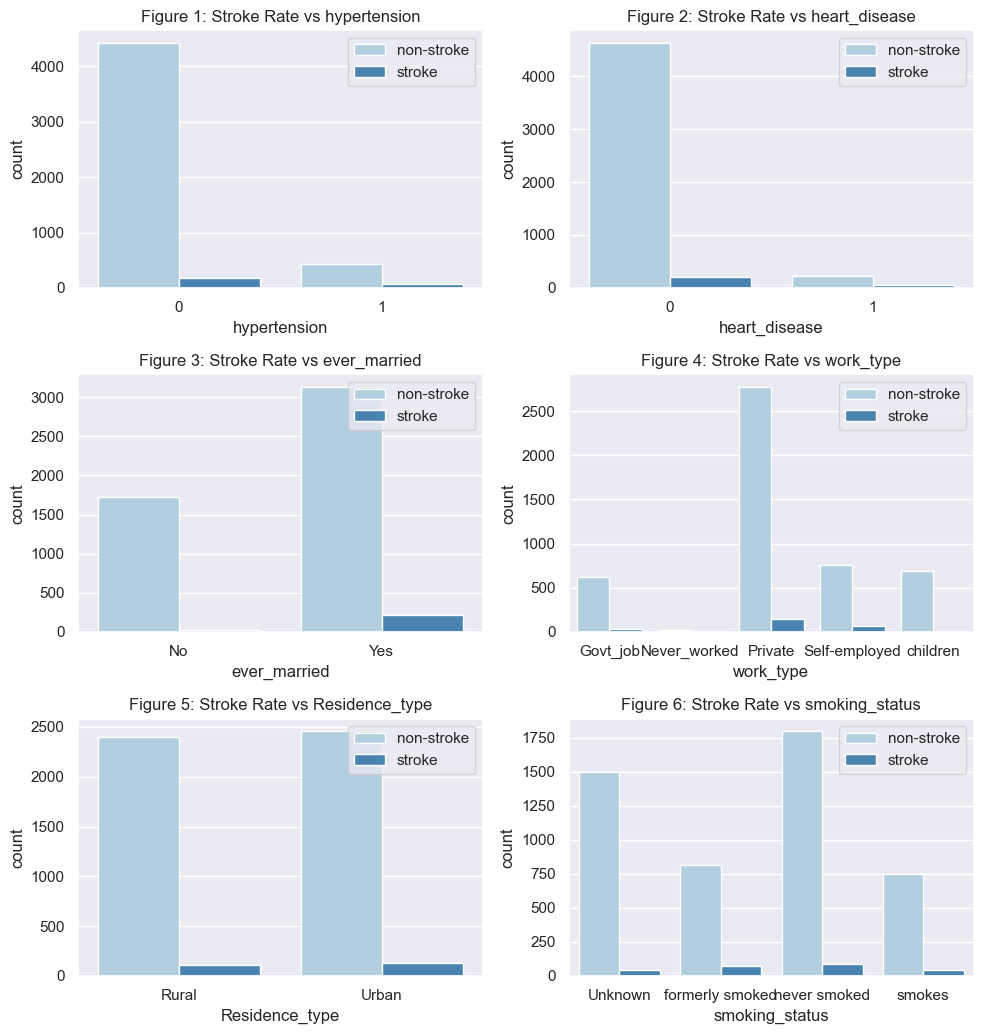

In [41]:
# hypertension (bệnh tăng huyết áp), heart_disease (bệnh tim), ever_married, work_type, residence_type
cols = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

n_rows = 3
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to loop through list 'cols'
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=patient_df, x = cols[i], hue='stroke', palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Stroke Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['non-stroke', 'stroke'])


plt.tight_layout()
plt.show();


### 3.1 Correlating numerical features
* Numerical: `age`, `avg_glucose_level`, `bmi` 

In [42]:
patient_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_title', 'bmi_title'],
      dtype='object')

In [43]:
patient_df[num_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.876419
std,22.612647,45.283560,7.723049
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.700000
50%,45.000000,91.885000,28.300000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


#### Age

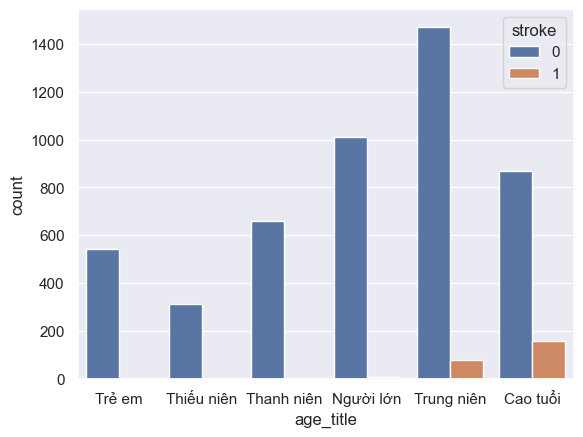

In [44]:
sns.countplot(data=patient_df, x='age_title', hue='stroke');

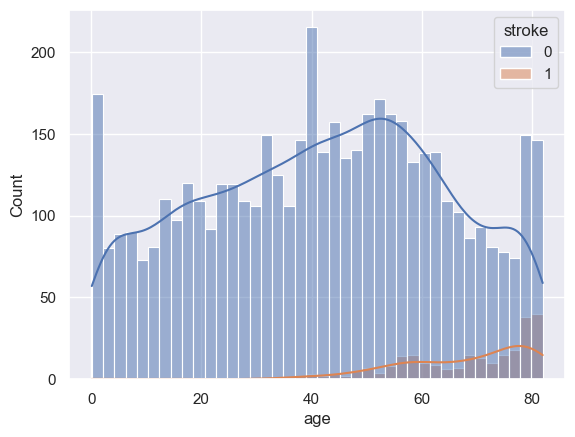

In [45]:
sns.histplot(data=patient_df, x='age', hue='stroke', bins=40, kde=True);

* Nhận xét: 
- Ở 40 tuổi, con người có thể xuất hiện bị đột quỵ.
- Từ 58-60 tuổi, số người bị đột quỵ ở độ tuổi này có dấu hiệu tăng.
- Đặc biêt, từ 78-82 tuổi (người cao tuổi) cực kỳ dễ bị đột quỵ vì tuổi già => Cần lưu ý chăm sóc người thân ở độ tuổi này.

#### BMI (body mass ...)

##### Pre-proccessing đặc trưng `bmi`

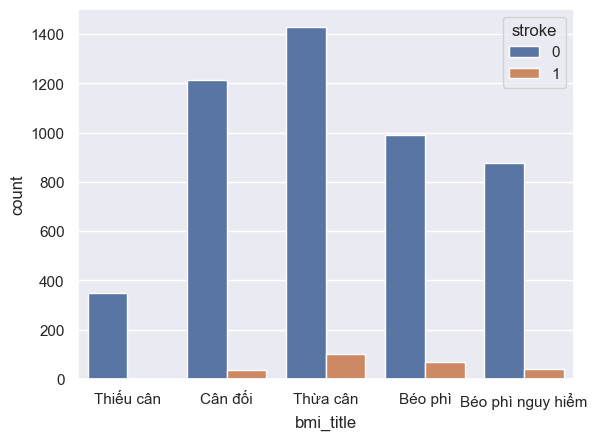

In [46]:
sns.countplot(data=patient_df, x='bmi_title', hue='stroke');

Nhận xét. 
* Người có bmi cân đối thì vẫn có nguy cơ đột quỵ nhưng ít
* Tuy nhiên, những người thừa cân, béo phì và béo phì nguy hiểm cần phải cẩn thận với bệnh đột quỵ

#### Mối quan hệ giữa age và bmi. Để nhận xét dữ liệu của ta

<Axes: xlabel='bmi', ylabel='Density'>

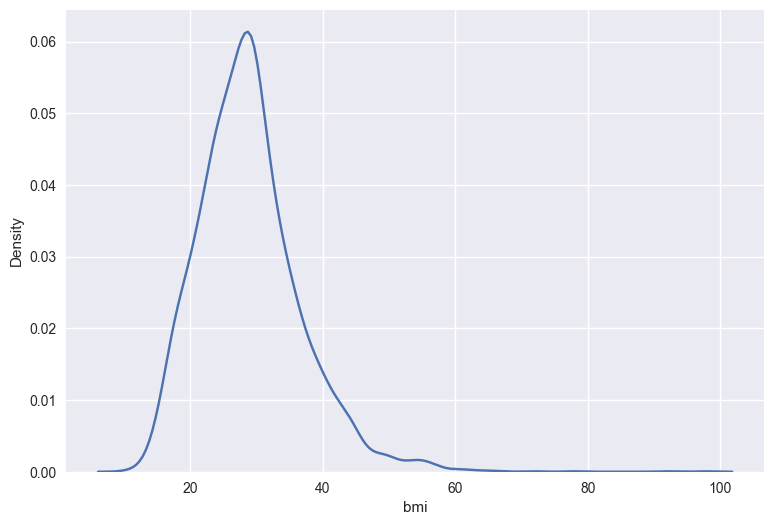

In [47]:
age, age_title, bmi = patient_df['age'], patient_df['age_title'], patient_df['bmi']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(9,6))

# plt.scatter(age, bmi, 
#             c=age, cmap='viridis',  alpha=0.7,
#             s=bmi, linewidths=0)

sns.kdeplot(patient_df['bmi'])
# plt.axis('equal')
# plt.title("Mối quan hệ giữa Age và BMI")
# plt.xlabel("Age")
# plt.ylabel("Bmi")
# plt.colorbar();